# Algerian Forest Fires Dataset 
Data Set Information:

The dataset includes 244 instances that regroup a data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

122 instances for each region.

The period from June 2012 to September 2012.
The dataset includes 11 attribues and 1 output attribue (class)
The 244 instances have been classified into fire(138 classes) and not fire (106 classes) classes.

Attribute Information:

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)

**Weather data observations**

2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8

**FWI Components**

6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely Fire and not Fire

## Importing the libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, LassoCV, RidgeCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pickle

%matplotlib inline

## Model Training

In [4]:
df = pd.read_csv('../data/Algerian_forest_fires_cleaned_dataset.csv') # Importing the cleaned dataset

In [5]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [6]:
df.drop(['day', 'month', 'year'], axis=1, inplace=True)

In [7]:
# Encoding
df['Classes'] = np.where(df['Classes'].str.contains('not fire'), 0, 1)

In [8]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [9]:
# Selecting independent and dependent features
X = df.drop('FWI', axis=1)
y = df['FWI']

### Train Test Split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [11]:
X_train.shape, X_test.shape

((182, 11), (61, 11))

### Feature Selection Based on Correlation

In [12]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


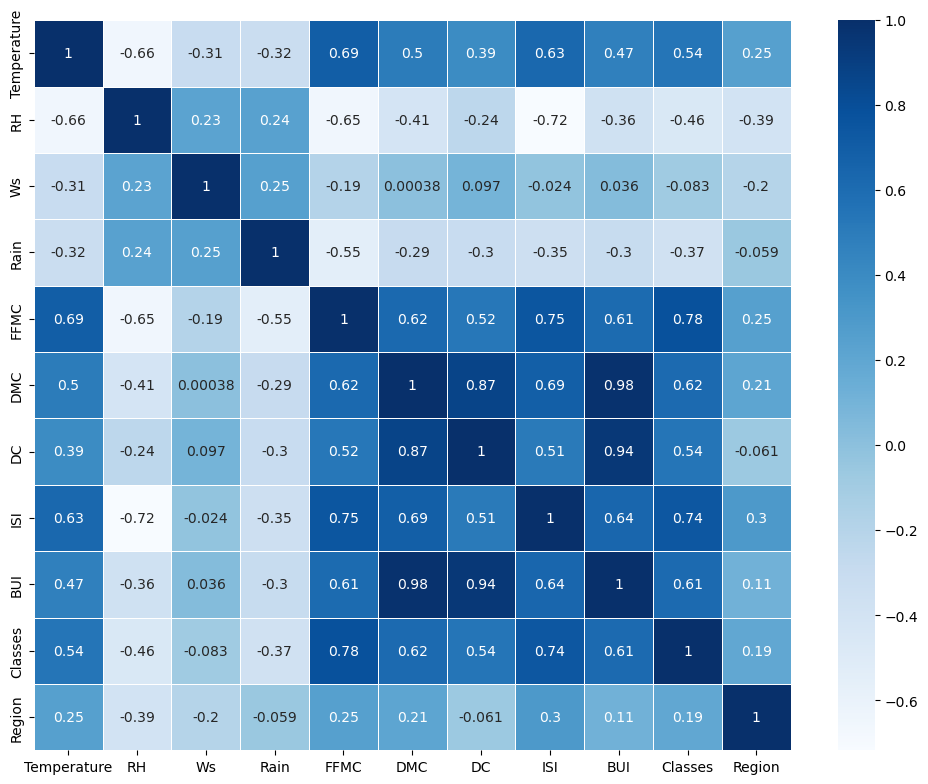

In [13]:
# Checking for multicollinearity
corr = X_train.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='Blues', linewidths=0.5)
plt.tight_layout()
plt.show()

In [14]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return list(col_corr)

In [15]:
# Threshold --> Domain Expertise
corr_features = correlation(X_train, 0.85)
print(corr_features)

['BUI', 'DC']


In [16]:
# Dropping features with correlation more than 0.85
X_train.drop(corr_features, axis=1, inplace=True)
X_test.drop(corr_features, axis=1, inplace=True)
X_train.shape, X_test.shape

((182, 9), (61, 9))

### Feature Scaling or Standardization

In [17]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

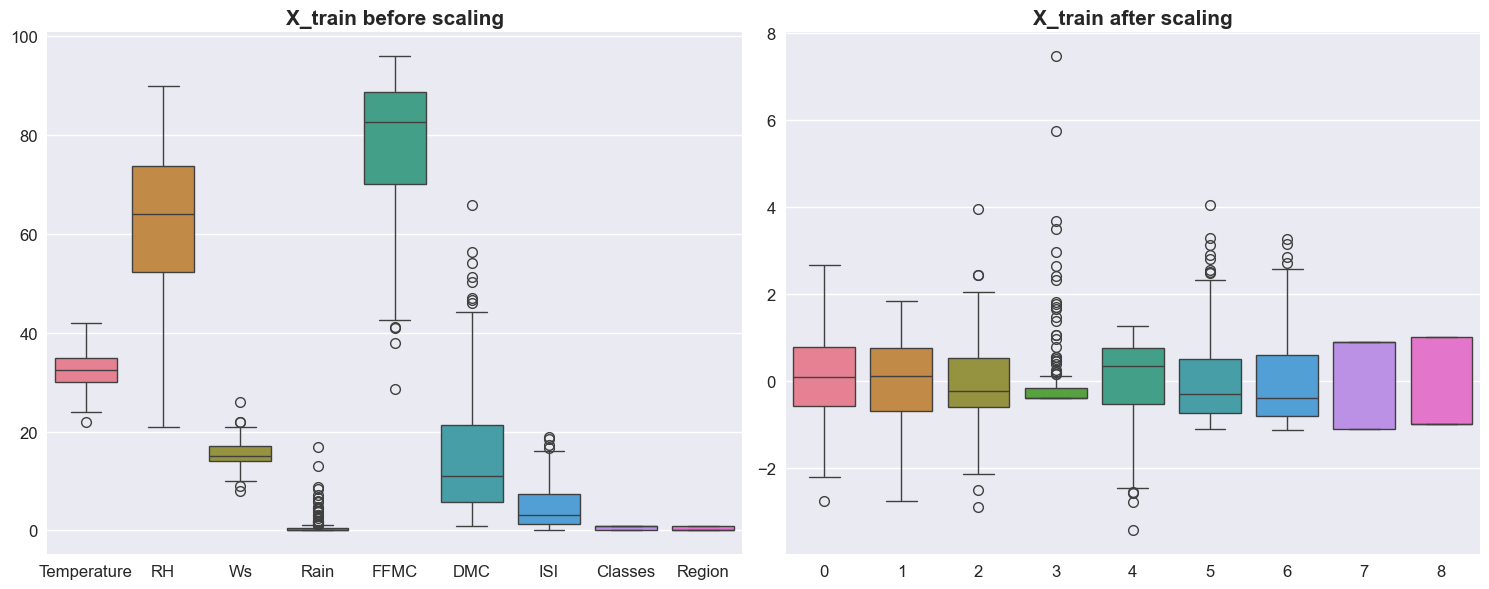

In [18]:
# Boxplot to understand the effect of standard scaler
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title("X_train before scaling", fontsize=15, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title("X_train after scaling", fontsize=15, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

### Linear Regression Model

In [19]:
linear_regression = LinearRegression()

In [20]:
linear_regression.fit(X_train_scaled, y_train)

LinearRegression()

In [21]:
y_pred = linear_regression.predict(X_test_scaled)

In [22]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
adjusted_r2 = 1 - (1 - r2) * (len(y) - 1) / (len(y) - X.shape[1] - 1)

In [23]:
print("Mean Squared Error ->", mse)
print("Mean Absolute Error ->", mae)
print("Root Mean Squared Error ->", rmse)
print("R^2 Score ->", r2)
print("Adjusted R^2 Score ->", adjusted_r2)

Mean Squared Error -> 0.6742766873791586
Mean Absolute Error -> 0.546823646524997
Root Mean Squared Error -> 0.8211435242265256
R^2 Score -> 0.9847657384266951
Adjusted R^2 Score -> 0.9840402973993949


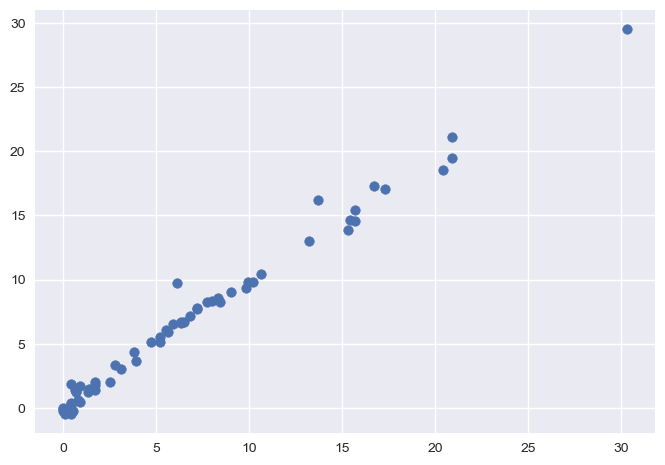

In [24]:
plt.scatter(y_test, y_pred)
plt.show()

### Lasso Regression Model

In [25]:
lasso_regression = Lasso()
lasso_regression.fit(X_train_scaled, y_train)
y_pred = lasso_regression.predict(X_test_scaled)

In [26]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
adjusted_r2 = 1 - (1 - r2) * (len(y) - 1) / (len(y) - X.shape[1] - 1)

print("Mean Squared Error ->", mse)
print("Mean Absolute Error ->", mae)
print("Root Mean Squared Error ->", rmse)
print("R^2 Score ->", r2)
print("Adjusted R^2 Score ->", adjusted_r2)

Mean Squared Error -> 2.248345891897477
Mean Absolute Error -> 1.133175994914409
Root Mean Squared Error -> 1.4994485292591662
R^2 Score -> 0.9492020263112388
Adjusted R^2 Score -> 0.9467830751832026


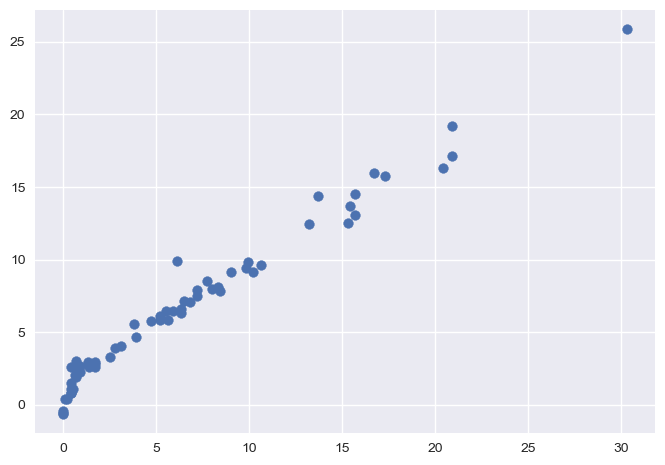

In [27]:
plt.scatter(y_test, y_pred)
plt.show()

#### Lasso Cross Validation

In [28]:
lassocv = LassoCV(cv=5)
lassocv.fit(X_train_scaled, y_train)

LassoCV(cv=5)

In [29]:
# The aplha value selected during cross validation
lassocv.alpha_

0.05725391318234411

In [30]:
# All the tried alpha values
lassocv.alphas_

array([7.05853002, 6.58280872, 6.13914944, 5.72539132, 5.33951911,
       4.97965339, 4.64404142, 4.33104857, 4.03915039, 3.76692517,
       3.51304702, 3.27627941, 3.05546914, 2.84954075, 2.65749124,
       2.47838523, 2.31135036, 2.15557308, 2.01029467, 1.87480753,
       1.74845178, 1.63061198, 1.52071419, 1.41822315, 1.32263965,
       1.23349817, 1.15036452, 1.0728338 , 1.00052839, 0.93309613,
       0.87020857, 0.81155943, 0.75686304, 0.705853  , 0.65828087,
       0.61391494, 0.57253913, 0.53395191, 0.49796534, 0.46440414,
       0.43310486, 0.40391504, 0.37669252, 0.3513047 , 0.32762794,
       0.30554691, 0.28495408, 0.26574912, 0.24783852, 0.23113504,
       0.21555731, 0.20102947, 0.18748075, 0.17484518, 0.1630612 ,
       0.15207142, 0.14182231, 0.13226397, 0.12334982, 0.11503645,
       0.10728338, 0.10005284, 0.09330961, 0.08702086, 0.08115594,
       0.0756863 , 0.0705853 , 0.06582809, 0.06139149, 0.05725391,
       0.05339519, 0.04979653, 0.04644041, 0.04331049, 0.04039

In [31]:
lassocv.mse_path_

array([[53.64536329, 65.39074075, 54.89628985, 77.90299066, 39.38236846],
       [46.99139716, 59.81506814, 49.29840831, 75.6645852 , 35.31758355],
       [41.14908917, 53.9178721 , 42.49594889, 68.35708298, 31.76996123],
       [36.05788169, 48.41773965, 36.66879347, 61.92819453, 28.67296816],
       [31.62067285, 42.76466229, 31.68391904, 56.26841266, 24.93183295],
       [27.75285367, 37.81922812, 27.42599138, 51.28216115, 21.56888645],
       [24.3807738 , 33.49107651, 23.7950306 , 45.25481907, 18.66094162],
       [21.44052804, 29.70161639, 20.70460191, 39.90418045, 16.14837778],
       [18.876308  , 26.38208059, 18.07969934, 35.23429953, 13.97821475],
       [16.63960395, 23.47341883, 15.85530749, 31.15712074, 12.10483403],
       [14.68819307, 20.92329068, 13.97555108, 27.59649208, 10.48862803],
       [12.98525144, 18.68636627, 12.39173305, 24.48611006,  9.09521221],
       [11.49893734, 16.72312788, 11.06186319, 21.7677198 ,  7.89445038],
       [10.2013182 , 14.9991189 ,  9.9

In [32]:
y_pred = lassocv.predict(X_test_scaled)

In [33]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
adjusted_r2 = 1 - (1 - r2) * (len(y) - 1) / (len(y) - X.shape[1] - 1)

print("Mean Squared Error ->", mse)
print("Mean Absolute Error ->", mae)
print("Root Mean Squared Error ->", rmse)
print("R^2 Score ->", r2)
print("Adjusted R^2 Score ->", adjusted_r2)

Mean Squared Error -> 0.7924995554743627
Mean Absolute Error -> 0.6199701158263431
Root Mean Squared Error -> 0.8902244410677358
R^2 Score -> 0.9820946715928275
Adjusted R^2 Score -> 0.9812420369067717


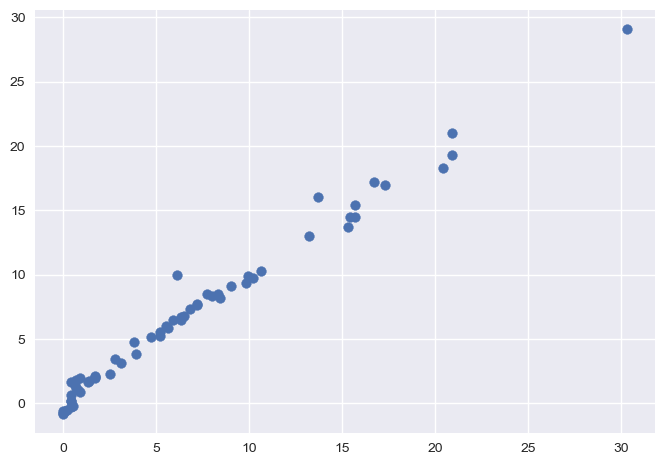

In [34]:
plt.scatter(y_test, y_pred)
plt.show()

### Ridge Regression Model

In [35]:
ridge_regression = Ridge()
ridge_regression.fit(X_train_scaled, y_train)
y_pred = ridge_regression.predict(X_test_scaled)

In [36]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
adjusted_r2 = 1 - (1 - r2) * (len(y) - 1) / (len(y) - X.shape[1] - 1)

print("Mean Squared Error ->", mse)
print("Mean Absolute Error ->", mae)
print("Root Mean Squared Error ->", rmse)
print("R^2 Score ->", r2)
print("Adjusted R^2 Score ->", adjusted_r2)

Mean Squared Error -> 0.6949198918152044
Mean Absolute Error -> 0.5642305340105679
Root Mean Squared Error -> 0.833618552945653
R^2 Score -> 0.9842993364555513
Adjusted R^2 Score -> 0.9835516858105776


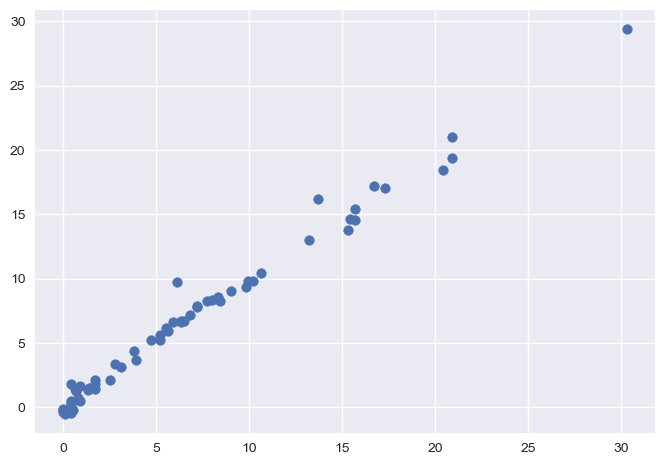

In [37]:
plt.scatter(y_test, y_pred)
plt.show()

#### Ridge Cross Validation

In [38]:
ridgecv = RidgeCV(cv=5)
ridgecv.fit(X_train_scaled, y_train)
y_pred = ridgecv.predict(X_test_scaled)

In [39]:
# The selected value for alpha
ridgecv.alpha_

1.0

In [40]:
# Values tried for alpha
ridgecv.alphas

(0.1, 1.0, 10.0)

In [41]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': None,
 'store_cv_values': 'deprecated'}

In [42]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
adjusted_r2 = 1 - (1 - r2) * (len(y) - 1) / (len(y) - X.shape[1] - 1)

print("Mean Squared Error ->", mse)
print("Mean Absolute Error ->", mae)
print("Root Mean Squared Error ->", rmse)
print("R^2 Score ->", r2)
print("Adjusted R^2 Score ->", adjusted_r2)

Mean Squared Error -> 0.6949198918152044
Mean Absolute Error -> 0.5642305340105679
Root Mean Squared Error -> 0.833618552945653
R^2 Score -> 0.9842993364555513
Adjusted R^2 Score -> 0.9835516858105776


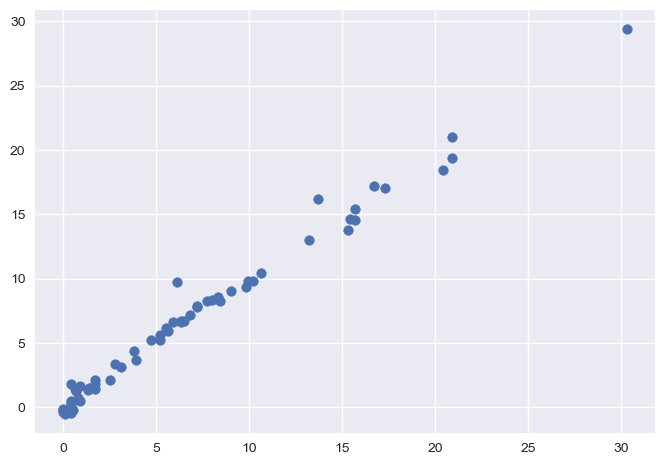

In [43]:
plt.scatter(y_test, y_pred)
plt.show()

### ElasticNet Regression Model

In [44]:
elasticnet_regression = ElasticNet()
elasticnet_regression.fit(X_train_scaled, y_train)
y_pred = elasticnet_regression.predict(X_test_scaled)

In [45]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
adjusted_r2 = 1 - (1 - r2) * (len(y) - 1) / (len(y) - X.shape[1] - 1)

print("Mean Squared Error ->", mse)
print("Mean Absolute Error ->", mae)
print("Root Mean Squared Error ->", rmse)
print("R^2 Score ->", r2)
print("Adjusted R^2 Score ->", adjusted_r2)

Mean Squared Error -> 5.517251101025224
Mean Absolute Error -> 1.8822353634896
Root Mean Squared Error -> 2.3488829474933874
R^2 Score -> 0.8753460589519703
Adjusted R^2 Score -> 0.8694101569973022


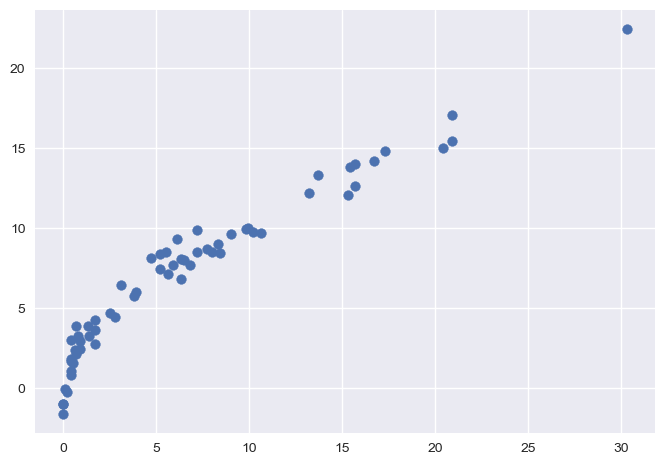

In [46]:
plt.scatter(y_test, y_pred)
plt.show()

#### ElasticNet Cross Validation

In [47]:
elasticnetcv = ElasticNetCV(cv=5)
elasticnetcv.fit(X_train_scaled, y_train)
y_pred = elasticnetcv.predict(X_test_scaled)

In [48]:
elasticnetcv.alpha_

0.04311146156383891

In [49]:
elasticnetcv.alphas_

array([14.11706004, 13.16561744, 12.27829889, 11.45078264, 10.67903821,
        9.95930678,  9.28808283,  8.66209714,  8.07830078,  7.53385034,
        7.02609405,  6.55255882,  6.11093829,  5.6990815 ,  5.31498248,
        4.95677045,  4.62270071,  4.31114616,  4.02058933,  3.74961507,
        3.49690356,  3.26122397,  3.04142839,  2.83644629,  2.64527931,
        2.46699633,  2.30072904,  2.1456676 ,  2.00105679,  1.86619226,
        1.74041714,  1.62311885,  1.51372607,  1.411706  ,  1.31656174,
        1.22782989,  1.14507826,  1.06790382,  0.99593068,  0.92880828,
        0.86620971,  0.80783008,  0.75338503,  0.7026094 ,  0.65525588,
        0.61109383,  0.56990815,  0.53149825,  0.49567705,  0.46227007,
        0.43111462,  0.40205893,  0.37496151,  0.34969036,  0.3261224 ,
        0.30414284,  0.28364463,  0.26452793,  0.24669963,  0.2300729 ,
        0.21456676,  0.20010568,  0.18661923,  0.17404171,  0.16231189,
        0.15137261,  0.1411706 ,  0.13165617,  0.12278299,  0.11

In [50]:
elasticnetcv.l1_ratio

0.5

In [51]:
elasticnetcv.get_params()

{'alphas': None,
 'copy_X': True,
 'cv': 5,
 'eps': 0.001,
 'fit_intercept': True,
 'l1_ratio': 0.5,
 'max_iter': 1000,
 'n_alphas': 100,
 'n_jobs': None,
 'positive': False,
 'precompute': 'auto',
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'verbose': 0}

In [52]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
adjusted_r2 = 1 - (1 - r2) * (len(y) - 1) / (len(y) - X.shape[1] - 1)

print("Mean Squared Error ->", mse)
print("Mean Absolute Error ->", mae)
print("Root Mean Squared Error ->", rmse)
print("R^2 Score ->", r2)
print("Adjusted R^2 Score ->", adjusted_r2)

Mean Squared Error -> 0.8222830416276262
Mean Absolute Error -> 0.6575946731430901
Root Mean Squared Error -> 0.9067982364493362
R^2 Score -> 0.9814217587854941
Adjusted R^2 Score -> 0.9805370806324224


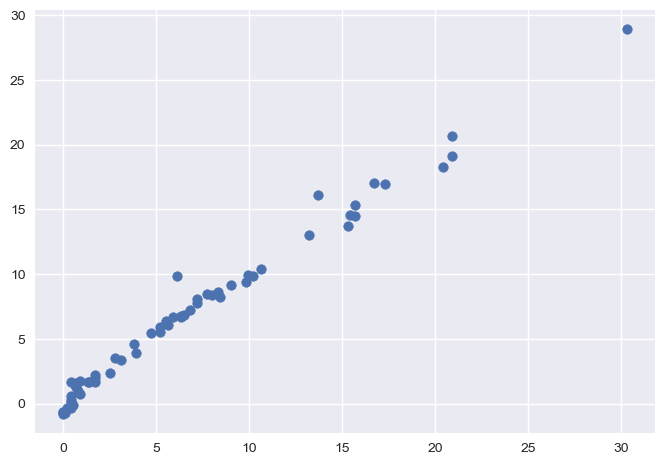

In [53]:
plt.scatter(y_test, y_pred)
plt.show()

## Pickling
Pickling the machine learning models and the preprocessing model (StandardScaler)

In [54]:
scaler

StandardScaler()

In [55]:
ridge_regression

Ridge()

- Mean Squared Error -> 0.6949198918152044
- Mean Absolute Error -> 0.5642305340105679
- Root Mean Squared Error -> 0.833618552945653
- R^2 Score -> 0.9842993364555513
- Adjusted R^2 Score -> 0.9835516858105776

**As the ridge regression model had the best performance that is why I am going use it as my primary model**

In [57]:
pickle.dump(scaler, open('../models/scaler.pkl', 'wb'))
pickle.dump(ridge_regression, open('../models/regression.pkl', 'wb'))